In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bball = pd.DataFrame({
    "Year": [2015, 2016, 2017]*2,
    "Player": ["Curry"]*3 + ["Durant"]*3,
    "Team": ["GSW"]*3 + ["OKC"] + ["GSW"]*2,
    "Pts": [30.1, 25.3, 27.1, 28.2, 25.1, 25.9],
    "Assist": [6.7, 6.6, 6.4, 5.0, 4.8, 5.3],
    "Rebound": [4.5, 3.9, 3.4, 4.4, 6.5, 7.6]
})

In [3]:
bball

,Year,Player,Team,Pts,Assist,Rebound
0,2015,Curry,GSW,30.1,6.7,4.5
1,2016,Curry,GSW,25.3,6.6,3.9
2,2017,Curry,GSW,27.1,6.4,3.4
3,2015,Durant,OKC,28.2,5.0,4.4
4,2016,Durant,GSW,25.1,4.8,6.5
5,2017,Durant,GSW,25.9,5.3,7.6


In [6]:
grp = bball.groupby("Team")

In [10]:
grp.groups

{'GSW': Int64Index([0, 1, 2, 4, 5], dtype='int64'),
 'OKC': Int64Index([3], dtype='int64')}

In [11]:
grp.get_group("OKC")

,Year,Player,Team,Pts,Assist,Rebound
3,2015,Durant,OKC,28.2,5.0,4.4


In [12]:
grp.get_group("GSW")

,Year,Player,Team,Pts,Assist,Rebound
0,2015,Curry,GSW,30.1,6.7,4.5
1,2016,Curry,GSW,25.3,6.6,3.9
2,2017,Curry,GSW,27.1,6.4,3.4
4,2016,Durant,GSW,25.1,4.8,6.5
5,2017,Durant,GSW,25.9,5.3,7.6


In [13]:
grp.mean()

,Year,Pts,Assist,Rebound
Team,,,,
GSW,2016.2,26.7,5.96,5.18
OKC,2015.0,28.2,5.00,4.40


In [14]:
grp.Pts.mean()

Team
GSW    26.7
OKC    28.2
Name: Pts, dtype: float64

In [29]:
transform_dict = {"Pts": "sum", "Year": "last" }

In [30]:
grp.agg(transform_dict)

,Pts,Year
Team,,
GSW,133.5,2017
OKC,28.2,2015


In [31]:
bball

,Year,Player,Team,Pts,Assist,Rebound
0,2015,Curry,GSW,30.1,6.7,4.5
1,2016,Curry,GSW,25.3,6.6,3.9
2,2017,Curry,GSW,27.1,6.4,3.4
3,2015,Durant,OKC,28.2,5.0,4.4
4,2016,Durant,GSW,25.1,4.8,6.5
5,2017,Durant,GSW,25.9,5.3,7.6


In [33]:
grp = bball.groupby(["Team", "Player"])

In [34]:
grp.groups

{('GSW', 'Curry'): Int64Index([0, 1, 2], dtype='int64'),
 ('GSW', 'Durant'): Int64Index([4, 5], dtype='int64'),
 ('OKC', 'Durant'): Int64Index([3], dtype='int64')}

In [36]:
grp.mean()

Year   Pts    Assist   Rebound
Team Player                                  
GSW  Curry   2016.0  27.5  6.566667  3.933333
     Durant  2016.5  25.5  5.050000  7.050000
OKC  Durant  2015.0  28.2  5.000000  4.400000

In [39]:
grp = bball.groupby(["Year", "Player"])

In [40]:
grp.groups

{(2015, 'Curry'): Int64Index([0], dtype='int64'),
 (2015, 'Durant'): Int64Index([3], dtype='int64'),
 (2016, 'Curry'): Int64Index([1], dtype='int64'),
 (2016, 'Durant'): Int64Index([4], dtype='int64'),
 (2017, 'Curry'): Int64Index([2], dtype='int64'),
 (2017, 'Durant'): Int64Index([5], dtype='int64')}

In [41]:
bball

,Year,Player,Team,Pts,Assist,Rebound
0,2015,Curry,GSW,30.1,6.7,4.5
1,2016,Curry,GSW,25.3,6.6,3.9
2,2017,Curry,GSW,27.1,6.4,3.4
3,2015,Durant,OKC,28.2,5.0,4.4
4,2016,Durant,GSW,25.1,4.8,6.5
5,2017,Durant,GSW,25.9,5.3,7.6


In [42]:
def best_by_pts(df):
    
    return df.nlargest(2,"Pts")

In [43]:
best_by_pts(bball)

,Year,Player,Team,Pts,Assist,Rebound
0,2015,Curry,GSW,30.1,6.7,4.5
3,2015,Durant,OKC,28.2,5.0,4.4


In [44]:
grp = bball.groupby("Player")

In [45]:
new_df = grp.apply(best_by_pts)

In [46]:
new_df

Year  Player Team   Pts  Assist  Rebound
Player                                            
Curry  0  2015   Curry  GSW  30.1     6.7      4.5
       2  2017   Curry  GSW  27.1     6.4      3.4
Durant 3  2015  Durant  OKC  28.2     5.0      4.4
       5  2017  Durant  GSW  25.9     5.3      7.6

In [47]:
def mean_dev_pts(df):
    
    df["mean_dev"] = df["Pts"] - df["Pts"].mean()
    
    return df

In [48]:
new_df = grp.apply(mean_dev_pts)

In [49]:
new_df

,Year,Player,Team,Pts,Assist,Rebound,mean_dev
0,2015,Curry,GSW,30.1,6.7,4.5,2.6
1,2016,Curry,GSW,25.3,6.6,3.9,-2.2
2,2017,Curry,GSW,27.1,6.4,3.4,-0.4
3,2015,Durant,OKC,28.2,5.0,4.4,1.8
4,2016,Durant,GSW,25.1,4.8,6.5,-1.3
5,2017,Durant,GSW,25.9,5.3,7.6,-0.5


In [4]:
pgame = pd.read_csv("https://github.com/mwaugh0328/data_bootcamp_spring_2018/raw/master/data/2016-17_playerBoxScore.csv")

In [5]:
pgame.head(15)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2016-10-25,08:00,Regular,Porziņģis,Kristaps,NY,East,Atlantic,Away,Loss,...,0.5000,4,3,7,CLE,East,Central,Home,Win,0
1,2016-10-25,08:00,Regular,Rose,Derrick,NY,East,Atlantic,Away,Loss,...,1.0000,2,1,3,CLE,East,Central,Home,Win,0
2,2016-10-25,08:00,Regular,Anthony,Carmelo,NY,East,Atlantic,Away,Loss,...,1.0000,1,4,5,CLE,East,Central,Home,Win,0
3,2016-10-25,08:00,Regular,Lee,Courtney,NY,East,Atlantic,Away,Loss,...,0.0000,1,2,3,CLE,East,Central,Home,Win,0
4,2016-10-25,08:00,Regular,Noah,Joakim,NY,East,Atlantic,Away,Loss,...,0.0000,1,5,6,CLE,East,Central,Home,Win,0
5,2016-10-25,08:00,Regular,Holiday,Justin,NY,East,Atlantic,Away,Loss,...,1.0000,1,5,6,CLE,East,Central,Home,Win,0
6,2016-10-25,08:00,Regular,Jennings,Brandon,NY,East,Atlantic,Away,Loss,...,0.8333,1,2,3,CLE,East,Central,Home,Win,0
7,2016-10-25,08:00,Regular,Thomas,Lance,NY,East,Atlantic,Away,Loss,...,0.0000,0,1,1,CLE,East,Central,Home,Win,0
8,2016-10-25,08:00,Regular,O'Quinn,Kyle,NY,East,Atlantic,Away,Loss,...,0.0000,1,4,5,CLE,East,Central,Home,Win,0
9,2016-10-25,08:00,Regular,Kuzminskas,Mindaugas,NY,East,Atlantic,Away,Loss,...,0.0000,0,1,1,CLE,East,Central,Home,Win,0


In [6]:
pgame.shape

(26145, 51)

In [10]:
pgame.columns

Index(['gmDate', 'gmTime', 'seasTyp', 'playLNm', 'playFNm', 'teamAbbr',
       'teamConf', 'teamDiv', 'teamLoc', 'teamRslt', 'teamDayOff', 'offLNm1',
       'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'playDispNm',
       'playStat', 'playMin', 'playPos', 'playHeight', 'playWeight',
       'playBDate', 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB', 'opptAbbr', 'opptConf',
       'opptDiv', 'opptLoc', 'opptRslt', 'opptDayOff'],
      dtype='object')

In [11]:
durant_game = pgame[pgame.playLNm == "Durant"]

In [15]:
durant_game.shape

(62, 51)

In [17]:
durant_game.head(15)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
59,2016-10-25,10:30,Regular,Durant,Kevin,GS,West,Pacific,Home,Loss,...,0.8000,0,10,10,SA,West,Southwest,Away,Win,0
523,2016-10-28,09:30,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,1.0000,0,17,17,NO,West,Southwest,Home,Loss,2
813,2016-10-30,06:00,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,0.9375,0,4,4,PHO,West,Pacific,Home,Loss,1
1156,2016-11-01,10:00,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,0.6667,1,4,5,POR,West,Northwest,Home,Loss,3
1497,2016-11-03,10:30,Regular,Durant,Kevin,GS,West,Pacific,Home,Win,...,0.6667,1,6,7,OKC,West,Northwest,Away,Loss,1
1679,2016-11-04,10:30,Regular,Durant,Kevin,GS,West,Pacific,Away,Loss,...,0.6250,1,4,5,LAL,West,Pacific,Home,Win,2
2144,2016-11-07,10:30,Regular,Durant,Kevin,GS,West,Pacific,Home,Win,...,0.8333,1,2,3,NO,West,Southwest,Away,Loss,3
2500,2016-11-09,10:30,Regular,Durant,Kevin,GS,West,Pacific,Home,Win,...,0.8000,0,10,10,DAL,West,Southwest,Away,Loss,1
2576,2016-11-10,09:00,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,1.0000,2,7,9,DEN,West,Northwest,Home,Loss,2
3100,2016-11-13,08:00,Regular,Durant,Kevin,GS,West,Pacific,Home,Win,...,1.0000,0,9,9,PHO,West,Pacific,Away,Loss,0


In [18]:
durant_game.dtypes

gmDate         object
gmTime         object
seasTyp        object
playLNm        object
playFNm        object
teamAbbr       object
teamConf       object
teamDiv        object
teamLoc        object
teamRslt       object
teamDayOff      int64
offLNm1        object
offFNm1        object
offLNm2        object
offFNm2        object
offLNm3        object
offFNm3        object
playDispNm     object
playStat       object
playMin         int64
playPos        object
playHeight      int64
playWeight      int64
playBDate      object
playPTS         int64
playAST         int64
playTO          int64
playSTL         int64
playBLK         int64
playPF          int64
playFGA         int64
playFGM         int64
playFG%       float64
play2PA         int64
play2PM         int64
play2P%       float64
play3PA         int64
play3PM         int64
play3P%       float64
playFTA         int64
playFTM         int64
playFT%       float64
playORB         int64
playDRB         int64
playTRB         int64
opptAbbr  

In [26]:
pd.to_datetime(durant_game["gmDate"], format="%Y-%m-%d", inplace = True)

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [22]:
durant_game["gmDate"] = pd.to_datetime(durant_game["gmDate"], format="%Y-%m-%d")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
durant_game.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
59,2016-10-25,10:30,Regular,Durant,Kevin,GS,West,Pacific,Home,Loss,...,0.8000,0,10,10,SA,West,Southwest,Away,Win,0
523,2016-10-28,09:30,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,1.0000,0,17,17,NO,West,Southwest,Home,Loss,2
813,2016-10-30,06:00,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,0.9375,0,4,4,PHO,West,Pacific,Home,Loss,1
1156,2016-11-01,10:00,Regular,Durant,Kevin,GS,West,Pacific,Away,Win,...,0.6667,1,4,5,POR,West,Northwest,Home,Loss,3
1497,2016-11-03,10:30,Regular,Durant,Kevin,GS,West,Pacific,Home,Win,...,0.6667,1,6,7,OKC,West,Northwest,Away,Loss,1


In [25]:
durant_game.dtypes

gmDate        datetime64[ns]
gmTime                object
seasTyp               object
playLNm               object
playFNm               object
teamAbbr              object
teamConf              object
teamDiv               object
teamLoc               object
teamRslt              object
teamDayOff             int64
offLNm1               object
offFNm1               object
offLNm2               object
offFNm2               object
offLNm3               object
offFNm3               object
playDispNm            object
playStat              object
playMin                int64
playPos               object
playHeight             int64
playWeight             int64
playBDate             object
playPTS                int64
playAST                int64
playTO                 int64
playSTL                int64
playBLK                int64
playPF                 int64
playFGA                int64
playFGM                int64
playFG%              float64
play2PA                int64
play2PM       

In [28]:
pd.to_datetime?

In [29]:
pd.Grouper?

In [30]:
durant_by_month = durant_game.groupby(pd.Grouper(key = "gmDate", freq = "M"))

In [37]:
durant_by_month["playPTS"].mean()

gmDate
2016-10-31    31.333333
2016-11-30    26.200000
2016-12-31    24.500000
2017-01-31    27.357143
2017-02-28    21.090909
2017-03-31          NaN
2017-04-30    20.333333
Freq: M, Name: playPTS, dtype: float64

In [39]:
plt.style.use("ggplot")

%matplotlib inline

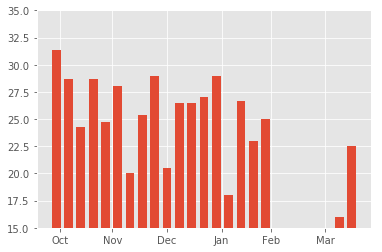

In [43]:
df = durant_game.groupby([pd.Grouper(key="gmDate", freq="W")]).mean()

#months = ["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"]

fix, ax = plt.subplots()

width = 5

ax.bar(df.index, df.playPTS, width)

ax.set_xticklabels(months)

ax.set_ylim(15,35)

plt.show()

In [44]:
df.index

DatetimeIndex(['2016-10-30', '2016-11-06', '2016-11-13', '2016-11-20',
               '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18',
               '2016-12-25', '2017-01-01', '2017-01-08', '2017-01-15',
               '2017-01-22', '2017-01-29', '2017-02-05', '2017-02-12',
               '2017-02-19', '2017-02-26', '2017-03-05', '2017-03-12',
               '2017-03-19', '2017-03-26', '2017-04-02', '2017-04-09',
               '2017-04-16'],
              dtype='datetime64[ns]', name='gmDate', freq='W-SUN')

In [45]:
df = durant_game.groupby(["teamLoc", pd.Grouper(key="gmDate", freq="M")]).mean()

In [52]:
df.head(15)

teamDayOff    playMin  playHeight  playWeight    playPTS  \
teamLoc gmDate                                                                 
Away    2016-10-31    1.500000  38.500000        81.0       225.0  33.500000   
        2016-11-30    1.500000  32.625000        81.0       225.0  24.250000   
        2016-12-31    1.000000  34.625000        81.0       225.0  25.125000   
        2017-01-31    1.166667  34.666667        81.0       225.0  28.000000   
        2017-02-28    1.285714  29.428571        81.0       225.0  20.857143   
Home    2016-10-31    0.000000  37.000000        81.0       225.0  27.000000   
        2016-11-30    2.000000  35.000000        81.0       225.0  28.428571   
        2016-12-31    2.375000  33.125000        81.0       225.0  23.875000   
        2017-01-31    2.375000  34.375000        81.0       225.0  26.875000   
        2017-02-28    4.250000  32.500000        81.0       225.0  21.500000   
        2017-04-30    2.333333  30.333333        81.0       225.0  20.333333   

                     playAST    playTO   playSTL   playBLK    playPF  \
teamLoc gmDate                                                         
Away    2016-10-31  5.000000  3.000000  3.000000  1.500000  2.000000   
        2016-11-30  5.375000  1.750000  2.000000  1.250000  2.375000   
        2016-12-31  4.125000  1.750000  0.875000  1.000000  2.500000   
        2017-01-31  5.000000  3.000000  1.166667  2.166667  1.833333   
        2017-02-28  4.000000  2.142857  0.571429  1.285714  1.857143   
Home    2016-10-31  4.000000  0.000000  2.000000  2.000000  2.000000   
        2016-11-30  4.000000  3.000000  0.571429  2.000000  1.857143   
        2016-12-31  5.500000  2.875000  0.625000  2.000000  1.750000   
        2017-01-31  4.375000  2.000000  1.000000  2.000000  1.375000   
        2017-02-28  7.250000  1.500000  1.500000  1.500000  1.250000   
        2017-04-30  5.666667  1.666667  0.666667  0.666667  1.666667   

                       ...       play3PA   play3PM   play3P%    playFTA  \
teamLoc gmDate         ...                                                
Away    2016-10-31     ...      3.500000  1.000000  0.250000  14.000000   
        2016-11-30     ...      4.750000  1.875000  0.343750   5.875000   
        2016-12-31     ...      5.000000  1.625000  0.344938   7.125000   
        2017-01-31     ...      5.500000  1.333333  0.272817   6.500000   
        2017-02-28     ...      4.857143  1.571429  0.276529   7.142857   
Home    2016-10-31     ...      3.000000  1.000000  0.333300   5.000000   
        2016-11-30     ...      5.428571  2.857143  0.491586   5.571429   
        2016-12-31     ...      4.750000  1.750000  0.390637   6.125000   
        2017-01-31     ...      5.750000  2.625000  0.452238   5.750000   
        2017-02-28     ...      4.750000  1.750000  0.389900   3.000000   
        2017-04-30     ...      5.333333  1.666667  0.238100   4.000000   

                      playFTM   playFT%   playORB    playDRB    playTRB  \
teamLoc gmDate                                                            
Away    2016-10-31  13.500000  0.968750  0.000000  10.500000  10.500000   
        2016-11-30   4.375000  0.752375  1.000000   6.625000   7.625000   
        2016-12-31   6.250000  0.852963  0.125000   8.500000   8.625000   
        2017-01-31   6.000000  0.924333  0.500000   6.500000   7.000000   
        2017-02-28   6.428571  0.793129  0.714286   5.428571   6.142857   
Home    2016-10-31   4.000000  0.800000  0.000000  10.000000  10.000000   
        2016-11-30   5.000000  0.871429  0.857143   7.571429   8.428571   
        2016-12-31   5.375000  0.727087  0.625000   9.750000  10.375000   
        2017-01-31   5.000000  0.702775  0.875000   6.250000   7.125000   
        2017-02-28   2.750000  0.708325  0.750000   9.250000  10.000000   
        2017-04-30   3.333333  0.833333  0.333333   9.000000   9.333333   

                    opptDayOff  
teamLoc gmDate                  
Away    2016-10-31    1.

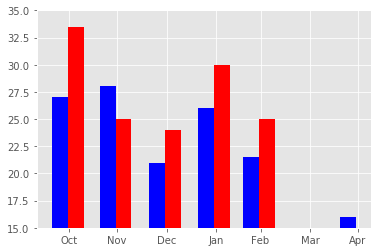

In [60]:
import datetime

df = durant_game.groupby(["teamLoc", pd.Grouper(key="gmDate", freq="M")]).median()

width = 10

fix, ax = plt.subplots()

ax.bar(df.loc["Home"].index - datetime.timedelta(5), df.loc["Home"].playPTS, width, color = 'b')

ax.bar(df.loc["Away"].index + datetime.timedelta(5), df.loc["Away"].playPTS, width, color = 'r')

ax.set_xticklabels(months)

ax.set_ylim(15,35)

plt.show()

In [58]:
df = durant_game.groupby(["teamLoc", pd.Grouper(key="gmDate", freq="M")])

In [59]:
df.groups

{('Away', Timestamp('2016-11-30 00:00:00')): Int64Index([523], dtype='int64'),
 ('Away', Timestamp('2016-12-31 00:00:00')): Int64Index([813], dtype='int64'),
 ('Away', Timestamp('2017-01-31 00:00:00')): Int64Index([1156], dtype='int64'),
 ('Away', Timestamp('2017-04-30 00:00:00')): Int64Index([1679], dtype='int64'),
 ('Home', Timestamp('2016-10-31 00:00:00')): Int64Index([59], dtype='int64'),
 ('Home', Timestamp('2017-02-28 00:00:00')): Int64Index([1497], dtype='int64')}

In [ ]:
df